# Time series correlation

As other data types, two time series may be correlated. It means they might have a statisical relationship. The most typical way of finding such correlation is to calculate the correlation coefficient, which is a number between -1 and 1, where -1 indicates the strongest disagreement and 1 the strongest agreement.

Time series correlation are usually considered with a *lag* - so we compare not only two time series at the same point of time only, but also check the possibility of correlation with a delay.

In [ ]:
%matplotlib inline

from IPython.display import display

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Example 03 - Finding correlation coefficient of two time series

For this example we use [room occupancy dataset](http://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+).

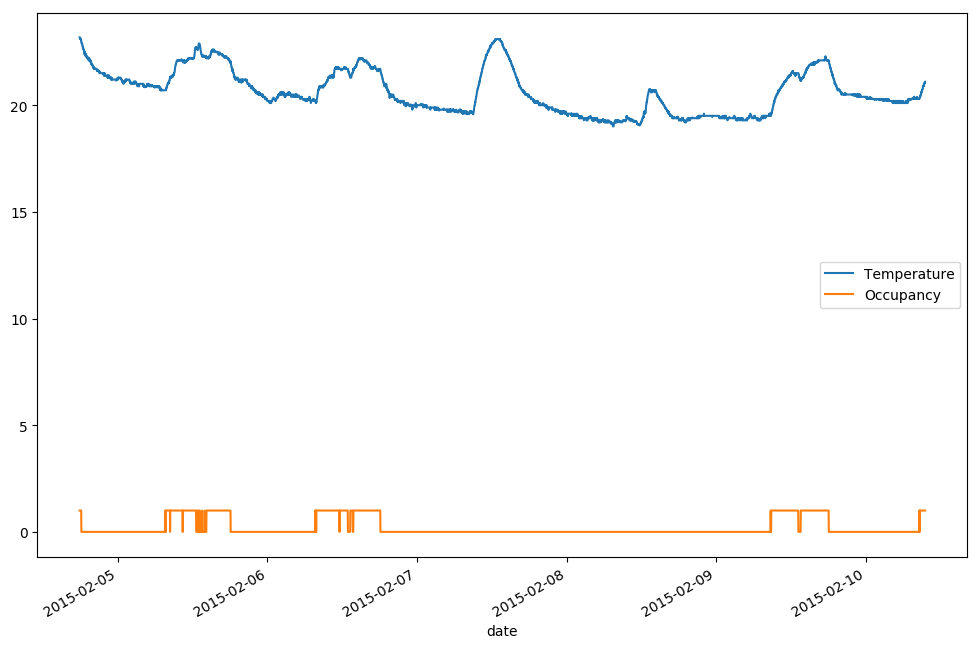

In [16]:
# Load the dataset and use the date as a DataFrame index
occupancy_df = pd.read_csv("data/occupancy-data-training.csv", delimiter=",")
occupancy_df.index = occupancy_df["date"].map(pd.to_datetime)
# Plot temperature and occupancy on a single chart
occupancy_df["Temperature"].plot(legend=True, label="Temperature")
occupancy_df["Occupancy"].plot(legend=True, label="Occupancy")

In [17]:
# Calculate the correlation in the same point of time
occupancy_df["Temperature"].corr(occupancy_df["Occupancy"])

0.5382196930177245

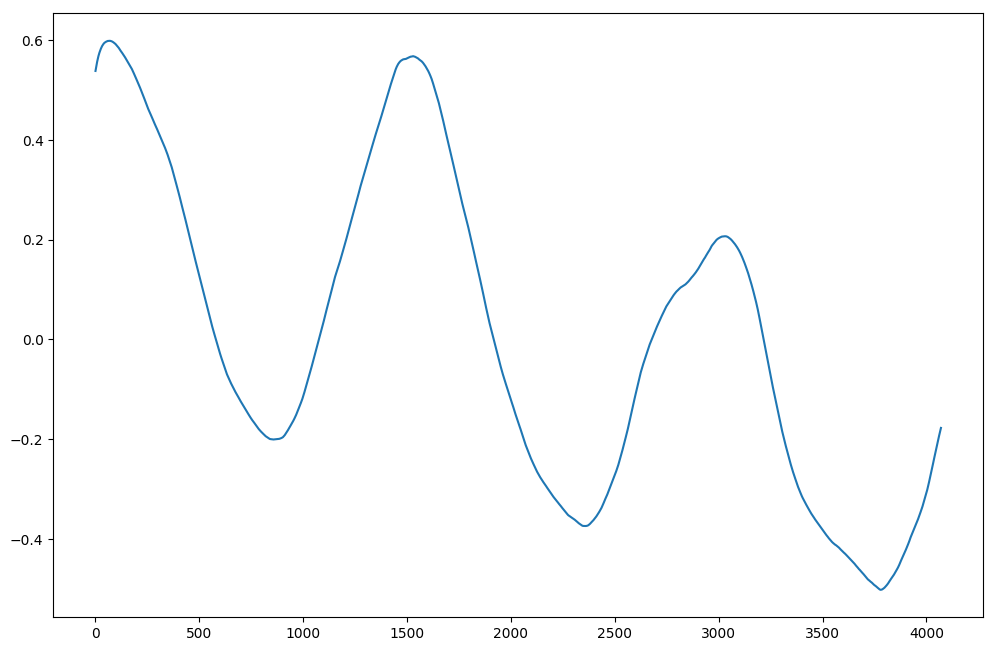

In [29]:
def lag_corr(s1, s2, lag):
    """
    Calculates the correlation between two Series, including the provided lag.
    """
    return s1.corr(s2.shift(lag))

# Calculate the correlation, including different lags (but half of time is the upper 
# limit for the lag, as we don't expect longer periods of time to influence future)
series_length = len(occupancy_df["Occupancy"])
lag_range = range(0, series_length // 2)
correlations = (lag_corr(occupancy_df["Temperature"], occupancy_df["Occupancy"], lag)
                for lag in lag_range)    
lag_correlation = pd.Series(data=correlations, index=lag_range)
# Display correlation coefficient over lag length
lag_correlation.plot()

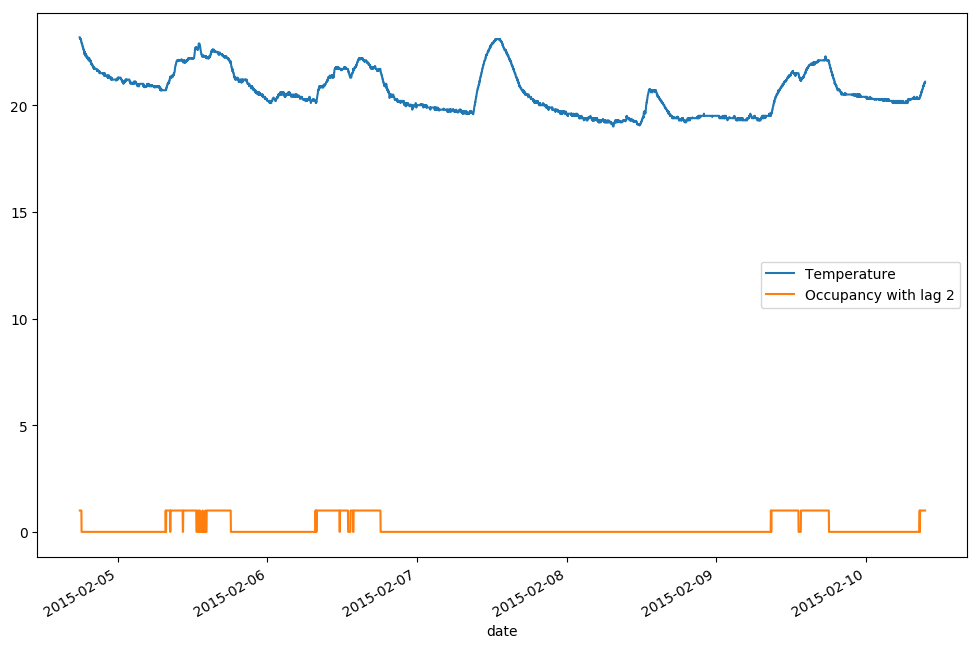

In [39]:
# Take the maxarg of correlation coefficient (lag with the highest correlation)
max_correlation_lag = lag_correlation.idxmax()
# Display the plots - the second one with defined lag
occupancy_df["Temperature"].plot(legend=True, label="Temperature")
occupancy_df["Occupancy"].shift(max_correlation_lag)\
    .plot(legend=True, label="Occupancy with lag %d" % max_correlation_lag)

In the example above we calculated the correlation between one of the features and the target variable. This process allows to choose the features which might have an impact on the output in Machine Learning projects.

## Example 04 - Autocorrelation of the same series
Autocorrelation is a cross-correlation calculated for the same data series. It allows to find some periodical patterns in given data.

URL: https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period#!ds=22r0&display=line

In [31]:
# Read the dataset and reindex it to use the month as an index
shampoo_sales_df = pd.read_csv("data/sales-of-shampoo-over-a-three-ye.csv", delimiter=",")
shampoo_sales_df.columns = ("Month", "Value")
shampoo_sales_df.index = shampoo_sales_df["Month"].map(pd.to_datetime)

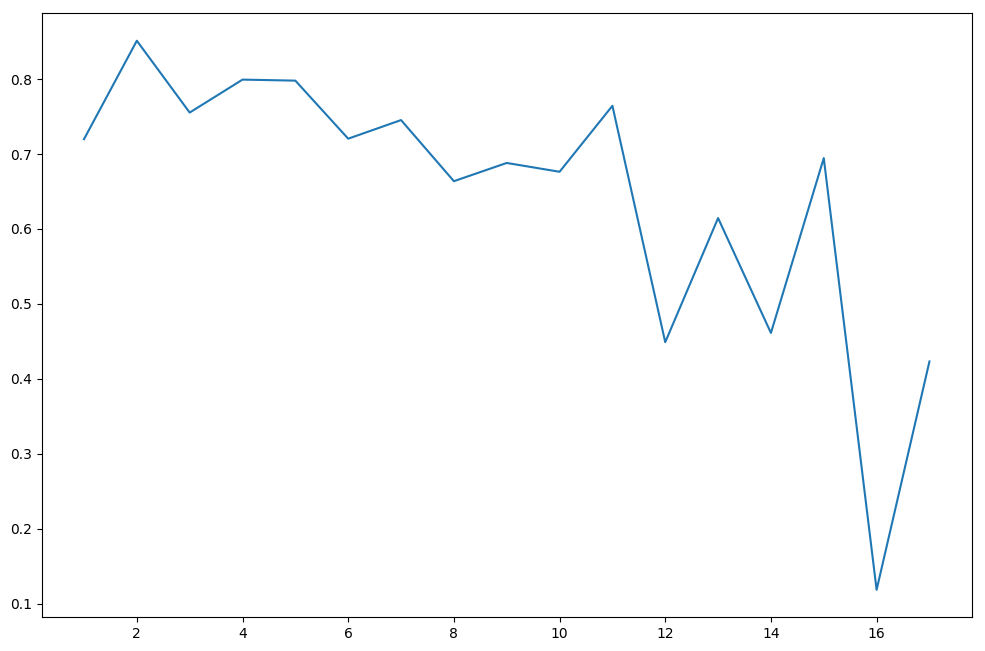

In [37]:
# Calculate the autocorrelation for the series (this time lag starts 
# from zero, as it will be always 1 for the same time series)
series_length = len(shampoo_sales_df["Value"])
lag_range = range(1, series_length // 2)
correlations = (lag_corr(shampoo_sales_df["Value"], shampoo_sales_df["Value"], lag)
                for lag in lag_range)    
lag_correlation = pd.Series(data=correlations, index=lag_range)
# Display correlation coefficient over lag length
lag_correlation.plot()